In [ ]:
# 18/04/23
# Balanceamento de dados 
# Importante quando a frequência das classes é 
# A Frequência de uma classe é diretamente proporcional a sua discriminação

# Dois problemas:
# 1. Desbalanceamento
# 2. Capacidade de verdadeiros positivos para as classes menos frequentes

# **Anotações:**

*   Over-sampling = ampliar a frequência de classes menos frequentes, aumenta a probabilidade de erros
*   Eu não posso alterar as probabilidades originais das classes ampliadas
*   Não podemos descaracterizar as classes menores!
*   k_neighbors = os valores dos atributos sintéticos são estimados usando KNN com cinco vizinhos 
*   KNN -> estimar um valor atrvés dos vizinhos ao seu redor, pode ser multidimensional ou linear
*   Em uma imagem o KNN é multidimensional, em dados tabulares é linear
<br><br>

*Todo erro tem base nos quadrados, o problema disso é que o resultado é grande, então trabalhamos com métodos de minimização (mínimos quadrados), isso mantém a proporção dos dados*

Smote busca síntese artificial com oscilação e os seus resultados tendem à normalidade <br><br>

**Teste de hipótese ->** se eu não consigo provar o contrário, eu aceito, até alguém conseguir provar o contrário <br>
Eu testo todas as hipóteses contrárias -> se eu não puder aceitá-las, então a hipótese inicial é aceita

Equidistante -> distribuição normal <br>
Curtose -> mais curto de um lado da curva de desvio padrão <br>

A normalidade ou ausência de normalidade me leva a comparação que vai aceitar ou não a minha hipótese



# **O pós-processamento existe! O Brasil tem muita pesquisa nessa área**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas==1.5.2

In [ ]:
import pandas as pd

# 1.Avaliar a frequência das classes
dados = pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes Avancados/fertility.csv', sep = ',')

dados.head(10)
dados['Output'].value_counts()

N    88
O    12
Name: Output, dtype: int64

In [ ]:
# 2.Segmentar os dados
from imblearn.over_sampling import SMOTE

dados_classes = dados['Output']

dados_atributos = dados.drop(columns=['Output'])
dados_atributos.columns

# Atributos sem classe (sem rótulo) = não dá pra manipular, mas eu posso sintetizar classes com clusters

# Criando atributos sintéticos de O para balancear
resampler = SMOTE()
dados_atributos_b, dados_classes_b = resampler.fit_resample(dados_atributos, dados_classes) 

dados_classes_b.value_counts()

N    88
O    88
Name: Output, dtype: int64

In [ ]:
# Exemplo de treinamento para obter uma Matriz de contingência / confusão
# O conjunto de dados das classes balanceadas precisa de um rótulo de coluna
dados_classes_b = pd.DataFrame(dados_classes_b, columns = ['Output'])

# Juntar os dados balanceados
dados_b = dados_atributos_b.join(dados_classes_b, how = 'left')
dados_b

,Season,Age,Childish_diseases,Accident,Surgical_intervention,High_fevers,alcohol_consumption,Smoking,hours_sitting,Output
0,-0.330000,0.690000,0,1,1,0,0.800000,0,0.880000,N
1,-0.330000,0.940000,1,0,1,0,0.800000,1,0.310000,O
2,-0.330000,0.500000,1,0,0,0,1.000000,-1,0.500000,N
3,-0.330000,0.750000,0,1,1,0,1.000000,-1,0.380000,N
4,-0.330000,0.670000,1,1,0,0,0.800000,-1,0.500000,O
...,...,...,...,...,...,...,...,...,...,...
171,0.662306,0.720241,1,0,1,0,0.800000,-1,0.345764,O
172,0.954194,0.675469,0,0,1,0,0.613673,0,0.495898,O
173,1.000000,0.684046,0,0,1,0,0.880916,0,0.457863,O
174,1.000000,0.670000,1,0,0,0,0.669725,0,0.380000,O


# **Código provisório só para ver matriz de contingência**

# **Confusion matrix**

Example of confusion matrix usage to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without normalization by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our choice for the regularization parameter C was not the best. In real life applications this parameter is usually chosen using Tuning the hyper-parameters of an estimator.
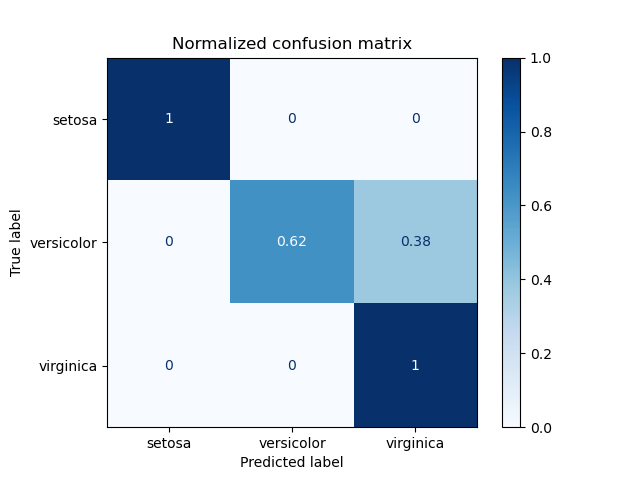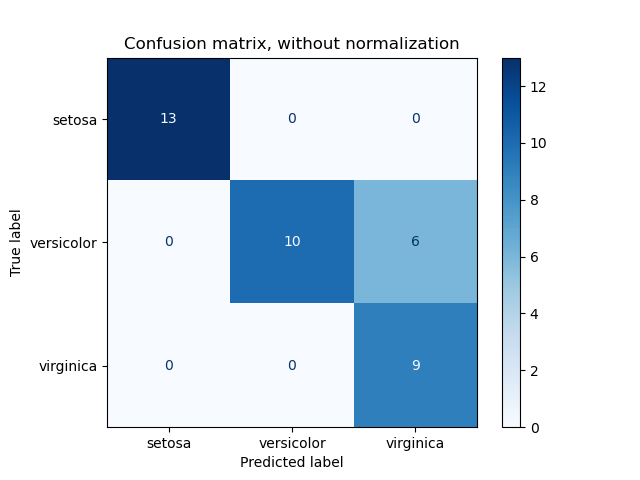


https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [ ]:
# MÉTODO FOR DUMMIES  
# Treinar um classificador
# OBS 1 = NÃO É OTIMIZADO, PORTANTO, NÃO É VÁLIDO
# OBS 2 = Esse treinamento servirá para comparar as matrizes de contingência entre dados balanceados e não balanceados
from pprint import pprint
from sklearn.model_selection import train_test_split
# Árvore é eficiente
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier() # Constrói o meta estimador para treinamento 
# class_test trinta porcento de teste
atr_train, atr_test, class_train, class_test = train_test_split(dados_atributos_b, dados_classes_b, test_size=0.3)
fertility_tree = tree.fit(atr_train, class_train)

In [ ]:
# Usar o modelo treinado provisório
Classes_predict = fertility_tree.predict(atr_test)
Classes_predict

array(['N', 'O', 'O', 'N', 'O', 'N', 'O', 'N', 'N', 'O', 'N', 'O', 'O',
       'O', 'N', 'O', 'N', 'O', 'O', 'O', 'N', 'O', 'O', 'N', 'N', 'N',
       'O', 'O', 'O', 'N', 'O', 'N', 'N', 'O', 'O', 'N', 'O', 'O', 'N',
       'N', 'O', 'O', 'O', 'O', 'O', 'N', 'N', 'N', 'O', 'O', 'N', 'O',
       'O'], dtype=object)

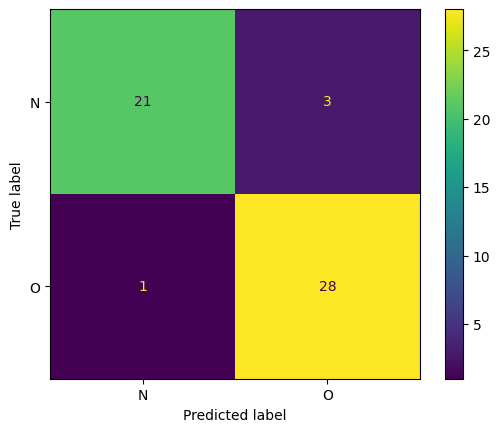

In [ ]:
# Matriz de contingência 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Argumentos = atributos que o split gerou, conjunto de valores resultado do predict
cm = confusion_matrix(class_test, Classes_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = fertility_tree.classes_)
disp.plot()

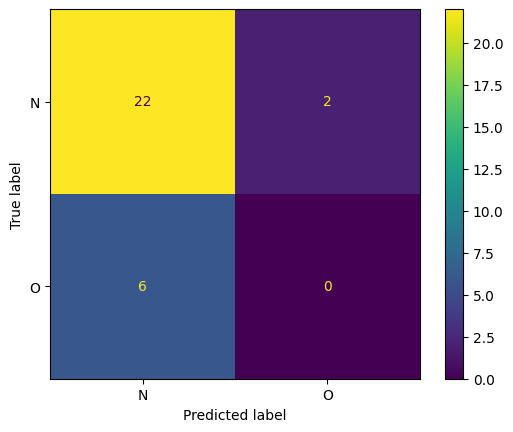

In [ ]:
# Incapaz de identificar classes menores
unbalanced_tree = DecisionTreeClassifier() 

u_atr_train, u_atr_test, u_class_train, u_class_test = train_test_split(dados_atributos, dados_classes, test_size=0.3)
unbalanced_fertility_tree = unbalanced_tree.fit(u_atr_train, u_class_train)

u_classes_predict = unbalanced_fertility_tree.predict(u_atr_test)
u_classes_predict

cm = confusion_matrix(u_class_test, u_classes_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = unbalanced_fertility_tree.classes_)
disp.plot()

# Quadrantes
# 1 - Falso negativo
# 2 - Verdadeiro negativo
# 3 - Verdadeiro positivo
# 4 - Falso positivo

### **Acurácia alta é indício de problema!**
### Em um teste saudável com perturbação derruba o valor de acurácia! 

<br><br><br><br><br>
# **Aula 25/04/23**

# HyperParametrização

### Usando random Forests

### Sobre Random Forests:
Random Forest is a Machine Learning algorithm which uses decision trees as its base. One of the most important features of random forest is that with the help of this algorithm, you can handle two different data sets in different cases.  For example, in regression, the random forest algorithm can easily handle data sets containing continuous variables. Simultaneously, in cases of classification, it can handle data sets containing categorical variables. Compared to other algorithms, random forest usually takes much lesser training time and can predict output with a higher level of accuracy, even in situations where there is a large dataset involved.
<br><br>

# Hyperparameters
There are various hyperparameters that can be controlled in a random forest:

**N_estimators**: The number of decision trees being built in the forest. Default values in sklearn are 100. N_estimators are mostly correlated to the size of data, to encapsulate the trends in the data, more number of DTs are needed. <br><br>
**Criterion**: The function that is used to measure the quality of splits in a decision tree (Classification Problem). Supported criteria are gini: gini impurity or entropy: information gain. In case of Regression Mean Absolute Error (MAE) or Mean Squared Error (MSE) can be used. Default is gini and mse.<br><br>
**Max_depth**: The maximum levels allowed in a decision tree. If set to nothing, The decision tree will keep on splitting until purity is reached.
<br><br>
**Max_features**: Maximum number of features used for a node split process. Types: sqrt, log2. If total features are n_features then: sqrt(n_features) or log2(n_features) can be selected as max features for node splitting.
<br><br>
**Bootstrap**: Bootstrap samples are used when building decision trees if True is selected in bootstrap, else whole data is used for every decision tree.
<br><br>
**Min_samples_split**: This parameter decides the minimum number of samples required to split an internal node. Default value =2. The problem with such a small value is that the condition is checked on the terminal node. If the data points in the node exceed the value 2, then further splitting takes place. Whereas if a more lenient value like 6 is set, then the splitting will stop early and the decision tree wont overfit on the data.
<br><br>
**Min_sample_leaf**: This parameter sets the minimum number of data point requirements in a node of the decision tree. It affects the terminal node and basically helps in controlling the depth of the tree. If after a split the data points in a node goes under the min_sample_leaf number, the split won’t go through and will be stopped at the parent node.
<br><br>
**Max_leaf_nodes**- With the help of this hyperparameter, a condition can be set on the splitting of the nodes in the tree. Thus, the growth of the tree gets automatically restricted. 
<br><br>
There are other less important parameters that can also be considered during the hyperparameter tuning process.
<br><br>
**n_jobs**: number of processors that can be used for training. (-1 for no limit)
<br><br>
**max_samples**: the maximum data that can be used in each Decision Tree
<br><br>
**random_state**: the model with a specific random_state will produce similar accuracy/ outputs.
<br><br>
**Class_weight**: dictionary input, that can handle imbalanced data sets.
<br><br>

Advantages and Disadvantages Of Random Forest Classifiers
Mentioned below are some of the strengths and weaknesses of random forest classifiers.

**Advantages**
<br>
Works more efficiently for a large range of data items than a single decision tree. 
They are very flexible and deliver highly accurate results.
They have much less variance when compared to a single decision tree. 
Even in the face of disruptions, especially when large sets of data go missing, random forests can still maintain good accuracy. 
<br><br>

**Disadvantages**
<br>

Random Forests algorithms usually involve a lot of complexities. 
Constructing Random forests usually requires much more time and effort than decision trees.
They tend to be less intuitive especially when there is a large collection of decision trees involved. 
Usually involves many computational resources for the implementation of the Random tree algorithm.
<br><br>
Font: https://www.upgrad.com/blog/random-forest-hyperparameter-tuning/#:~:text=In%20random%20forest%2C%20the%20hyperparameters,tunes%20the%20number%20of%20features.

# **Anotações da aula - 25/04/23**

- O ideal é trabalhar com uma amostra que tenha a aleatoriedade necessária para 
representar a base <br>
- Pesquisar covariância <br>
- Um atributo com características naturais é perturbado <br>
- A perturbação tem níveis de incidência, o que varia a maneira de avaliar o ganho do algoritmo <br>
- Em classificadores de árvore eu determino a sequência de avaliação, os primeiros são os que precisam de muita perturbação para mudar sua classe, enquanto as folhas precisam de mudanças pequenas
- Ou seja, a entropia de cima é maior que a das pontas da árvore, isso é o criterion
- A Random Forest segmenta a base aleatoriamente na vertical e na horizontal sem reposição, o tamanho dos segmentos e o conjunto de atributos é diferente
- Ela matematicamente reduz o erro, já que as classificações de erro tendem a acontecer com dados repetidos
- Isso faz com que a acurácia da rede seja verdadeira, já que ela força a classificação com dados aleatórios
- Rolldout -> você não treina todos os seus exemplos, você treina 30/70, para poder testar com instâncias desconhecidas

-----------------------------------------------------------------------------

Cross Validation é uma técnica muito utilizada para avaliação de desempenho de modelos de aprendizado de máquina. O CV consiste em particionar os dados em conjuntos(partes), onde um conjunto é utilizado para treino e outro conjunto é utilizado para teste e avaliação do desempenho do modelo. A utilização do CV tem altas chances de detectar se o seu modelo está sobreajustado aos seus dados de treinamento, ou seja, sofrendo overfitting.

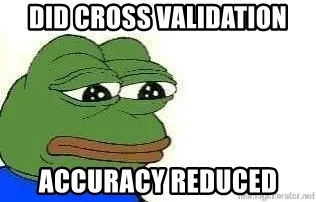

# K-fold Cross Validation
K-fold consiste em dividir a base de dados de forma aleatória em K subconjuntos (em que K é definido previamente) com aproximadamente a mesma quantidade de amostras em cada um deles. A cada iteração, treino e teste, um conjunto formado por K-1 subconjuntos são utilizados para treinamento e o subconjunto restante será utilizado para teste gerando um resultado de métrica para avaliação (ex: acurácia). Esse processo garante que cada subconjunto será utilizado para teste em algum momento da avaliação do modelo.

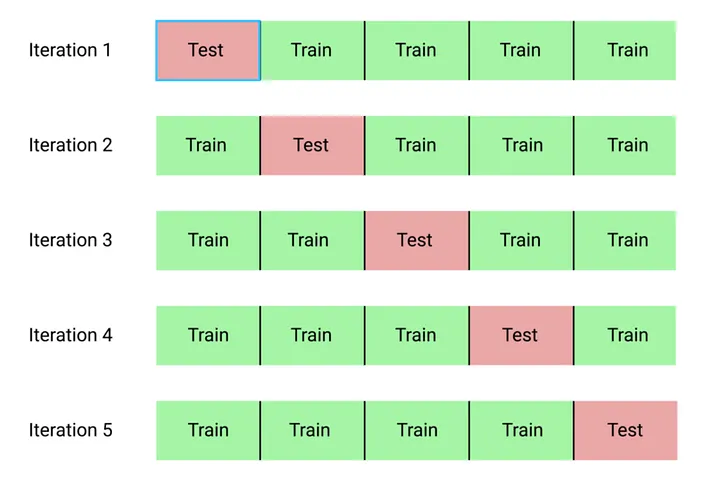

In [ ]:
## Hiperparametrização
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
import numpy as np

# Lista de parâmetros
rf = RandomForestClassifier(random_state= 42)
pprint(rf.get_params())

In [ ]:
# Determinar as faixas de valores para cada hiperparâmetro
n_estimators = [int(x) for x in np.linspace(start=10, stop=300, num=10)]
criterion = ['gini', 'entropy']
min_samples_split = [int(x) for x in np.linspace(start=2, stop=10, num=3)]
max_depth = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
max_features = ['auto', 'sqrt', 'log2']

# Criar grade de valores
rf_grid = {
    'n_estimators':n_estimators,
    'criterion': criterion,
    'min_samples_split': min_samples_split,
    'max_depth': max_depth,
    'max_features': max_features
}

In [ ]:
# Rodar GridSearch (treinamento e avalicação da rede)
from sklearn.model_selection import RandomizedSearchCV 

# Cross validation -> segmenta a base e treina cada um individualmente e depois tira a média de todos eles
# Pensar na segmentação -> confiança e erro amostral!

# (Indutor) Construir um objeto a partir da RandomForestClassifier
rf = RandomForestClassifier()
rf_hyperparameters = RandomizedSearchCV(estimator = rf,
                                        param_distributions = rf_grid,
                                        n_iter = 10,
                                        cv = 10,
                                        verbose = 1,
                                        random_state = 42, 
                                        n_jobs = -1)

rf_hyperparameters.fit(atr_train, class_train)
# Imprimir a melhor combinação de hiperparâmetros
pprint(rf_hyperparameters.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 138}


In [ ]:
# Treinar o modelo ML
rf = RandomForestClassifier(**rf_hyperparameters.best_params_)
fertility_rf = tree.fit(dados_atributos_b, dados_classes_b)

pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 138,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# **IMPORTANTE:**

**Especificidade: capacidade de obter verdadeiros negativos -> tn / tn + fp**<br>*texto em itálico*
**Sensibilidade: capacidade de obter verdadeiros positivos -> tp / tp + fn**

In [ ]:
from sqlalchemy.sql.elements import SQLColumnExpression
# Testar o modelo de cross validation
from sklearn.model_selection import cross_validate

# Pegar a base separada em atributos e classes, treinar o objeto rf, vau fazer dez sequencias de teste e vai entregar um dic score_cross, que dentro contem varios atributos
scoring = ['precision_macro', 'recall_macro']
score_cross = cross_validate(rf, dados_atributos_b, dados_classes_b, cv=10, scoring=scoring)
print('Matriz de sensibilidades: ', score_cross['test_precision_macro'])
print('Matriz de especifidades: ', score_cross['test_recall_macro'])

# Métricas finas: calcular as médias
print("Espeficidade: ", score_cross['test_precision_macro'].mean()) # tn/ tn + fp
print('Sensibilidade: ', score_cross['test_precision_macro'].mean()) # tp / tp + fn

Pesquisar sobre: **Gradient Boosting Regressor**
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html